In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# aaa
import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [3]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

In [4]:
config_file = "../configs/text/e2e_faster_rcnn_X_101_32x8d_FPN_quick_epoch6.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

In [5]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.6,
)

In [6]:
img_path = '/workspace/coco_style_all_data/images/val/1520750850777.png'
pil_image = Image.open(img_path).convert("RGB")
image = np.array(pil_image)[:, :, [2, 1, 0]]

In [7]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

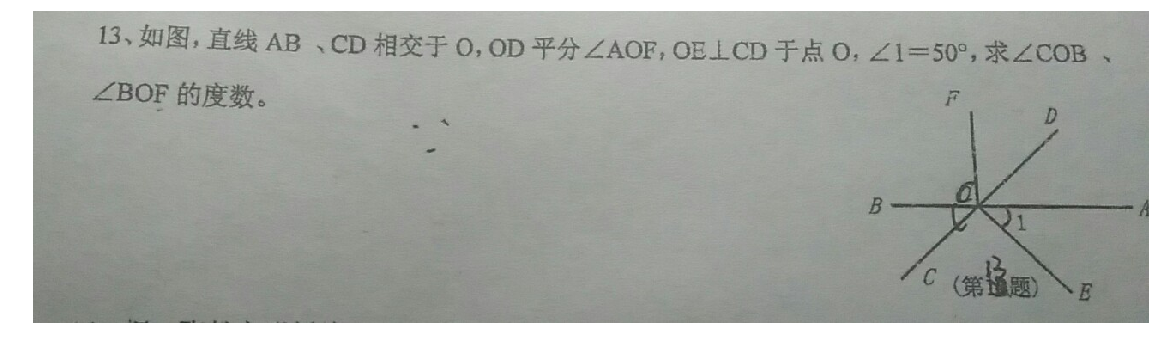

In [ ]:
imshow(image)

In [ ]:
predictions = coco_demo.run_on_opencv_image(image)

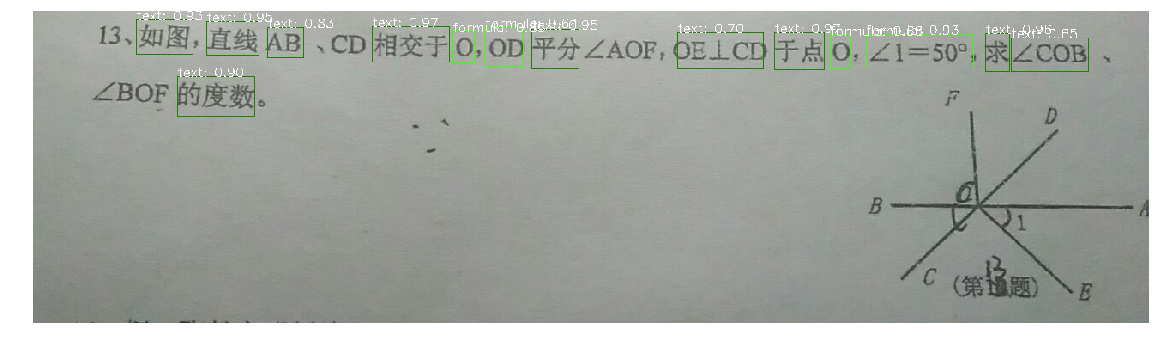

In [ ]:
imshow(predictions)

In [ ]:
predictions = coco_demo.compute_prediction(image)
top_predictions = coco_demo.select_top_predictions(predictions)

In [ ]:
top_predictions.bbox

In [ ]:
top_predictions.extra_fields